<a href="https://colab.research.google.com/github/Raul-rx7/projeto_circuitos_rc/blob/main/projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ensino de Circuitos-RC Usando Python

O conteúdo de circuito R-C é parte fundamental no ensino de eletromagnetismo, pois o mesmo abre espaço para melhor compreensão do comportamento de resistores e capacitores, como funciona o efeito joule no resistor e como o valor da capacitância influencia no armazenamento de energia. Essas ideias precisam ser passadas de maneira que os alunos possam compreender melhor o conteúdo. Então, visando contribuir para as boas práticas de ensino de física, o presente trabalho tem como objetivo apresentar um produto educacional para auxiliar o ensino de circuitos R-C utilizando a linguagem de programação python, por meio da análise de gráficos a partir das simulações realizadas.

In [1]:
# 1º PASSO: Rodar os códigos de importação das bibliotecas necessárias
# Obs.: Não rodar as próximas células de códigos sem rodar essa primeiro.
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## Circuitos RC: uma breve revisão

- Carregando o capacitor:
$$q = cv(1 - e^{-t/T})$$

$$i = \frac{v}{R} e^{-t/T}$$

- Descarregando o capacitor:
$$q_{2} = Q_{0} e^{-t/T}$$


$$i_{2} = -\frac{Q_{0}}{RC} e^{-t/T} = I_{0}e^{-t/T}$$

- Lembrando alguns prefixos para as potências de dez: 
  - $k$ (kilo) : $10^{3}$
  - $c$ (centi) : $10^{-2}$
  - $m$ (mili) : $10^{-3}$
  - $\mu$ (micro) : $10^{-6}$
  - $n$ (nano) : $10^{-9}$
  - $p$ (pico) : $10^{-12}$
  - $f$ (femto) : $10^{-15}$

In [2]:
# 2º PASSO:

############### DEFINIÇÃO DAS FUNÇÕES DESCRITAS ACIMA ################ 
#  OBS.: AS FUNÇÕES ABAIXO PODEM SER UTILIZADAS A QUALQUER MOMENTO   #
######################################################################

# Circuito R-C
# Carregando um capacitor:
def Q(c, r, v, t):
  return (c*v)*(1 - np.exp(-t/(r*c)))


# Corrente instantânea
def I(c, r, v, t):
  return v*(np.exp(-t/(r*c)))/r


# Descarregando um capacitor:
def Q2(c, r, v, t):
  #      Q0 : ponto de partida (ao carregar) 
  return Q(c, r, v, t).max()*np.exp(-t/(r*c))


# Corrente instantânea
def I2(c, r, v, t):
  return -Q2(c, r, v, t)/(r*c)

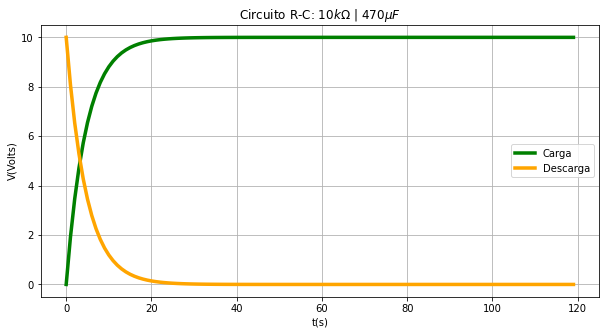

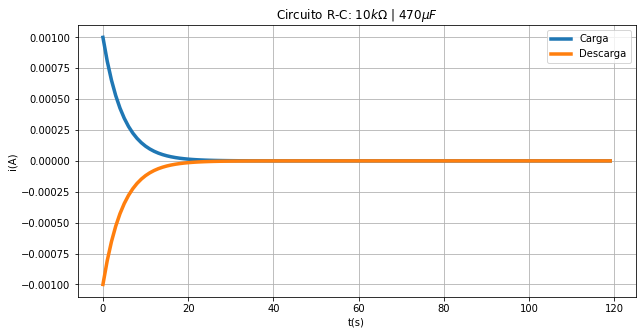

In [4]:
# PROCEDIMENTO 1: 10 kOhms e 470 uF/10V
# 3º PASSO: Simulações de carga e descarga do capacitor.

# É preciso indicar os valores de capacitância (C), resistência (R), 
# voltagem (V) e o tempo de observação (t), 
# para simulação de carga e descarga.

# Obs.: Atenção com as unidades de medidas e potências de dez!
 
C = 470*(10**(-6))        # Farad
R = 10*(10**(3))          # Ohms
V = 10                    # Volts

# Passo do tempo para simulação
#t = np.array(list(np.arange(0, 35, 5)) + list(np.arange(40, 90, 10)) + [100, 120])
t = np.arange(0, 120)

q = Q(C, R, V, t)         # Chamando a função de carga no carregamento
i = I(C, R, V, t)         # Chamando a função de corrente no carregamento 

q2 = Q2(C, R, V, t)       # Chamando a função de carga no descarregamento
i2 = I2(C, R, V, t)       # Chamando a função de corrente no descarregamento

# Carga e descarga sob o ponto de vista da d.d.p.
fig = plt.figure(figsize=(10, 5))
plt.plot(t, q/C, color="green", label="Carga", linewidth=3.5) # Vc = q/C
plt.plot(t, q2/C, color="orange", label="Descarga", linewidth=3.5)
plt.xlabel("t(s)")
plt.ylabel("V(Volts)")
plt.title(r"Circuito R-C: $10 k\Omega \ | \ 470 \mu F$")
plt.grid()
plt.legend(loc=0)
plt.show()
fig.savefig('fig1.png') # Formatos: (.png) ; (.jpg) ; (.pdf), por exemplo.
plt.close()


# Carga e descarga sob o ponto de vista da corrente.
fig = plt.figure(figsize=(10, 5))
plt.plot(t, i, label= "Carga", linewidth=3.5)
plt.plot(t, i2, label= "Descarga", linewidth=3.5)

plt.xlabel("t(s)")
plt.ylabel("i(A)")
plt.title(r"Circuito R-C: $10 k\Omega \ | \ 470 \mu F$")
plt.grid()
plt.legend(loc=0)
plt.show()
fig.savefig('fig2.png')
plt.close()

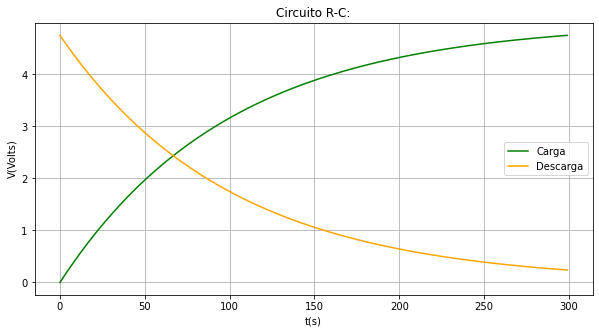

In [ ]:
# 3º PASSO: Simulações de carga e descarga do capacitor.

# É preciso indicar os valores de capacitância (C), resistência (R), voltagem (V) e o 
# tempo de observação (t), para simulação de carga e descarga.

# Obs.: Atenção com as unidades de medidas e potências de dez!
 
C = 1*(10**(-2))          # Farad
R = 10*(10**(3))          # Ohms
V = 5                     # Volts
t = np.arange(0, 300, 1)  # 300 segs

q = Q(C, R, V, t)         # Chamando a função de carga no carregamento
i = I(C, R, V, t)         # Chamando a função de corrente no carregamento 

q2 = Q2(C, R, V, t)       # Chamando a função de carga no descarregamento
i2 = I2(C, R, V, t)       # Chamando a função de corrente no descarregamento

# Carga e descarga sob o ponto de vista da d.d.p.
fig = plt.figure(figsize=(10,5))
plt.plot(t, q/C, color="green", label="Carga") # Vc = q/C
plt.plot(t, q2/C, color="orange", label="Descarga")
plt.xlabel("t(s)")
plt.ylabel("V(Volts)")
plt.title("Circuito R-C:")
plt.grid()
plt.legend(loc=0)
plt.show()
fig.savefig('fig1.png') # Formatos: (.png) ; (.jpg) ; (.pdf), por exemplo.
plt.close()

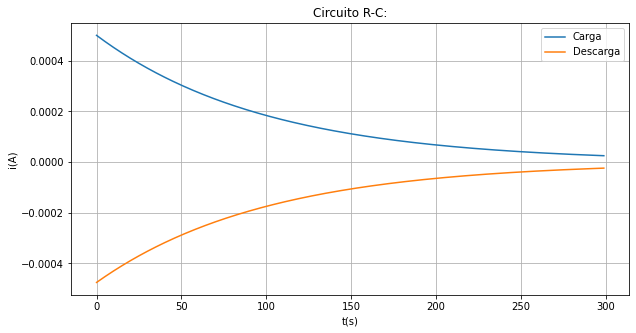

In [ ]:
# Carga e descarga sob o ponto de vista da corrente.
fig = plt.figure(figsize=(10,5))
plt.plot(t, i, label= "Carga")
plt.plot(t, i2, label= "Descarga")

plt.xlabel("t(s)")
plt.ylabel("i(A)")
plt.title("Circuito R-C:")
plt.grid()
plt.legend(loc=0)
plt.show()
fig.savefig('fig2.png')
plt.close()

### Resultados da teoria
- Acima segue as simulações realizadas a partir da teoria;
- Note que os parâmetros (os dados) podem ser modificados, tais como a **capacitância**, **resistência** e **ddp**, assim como **tempo (seg)** de observação da simulação.

Observe que os gráficos são semelhantes, de maneira que comprova a eficácia da codificação escrita baseada na teoria.

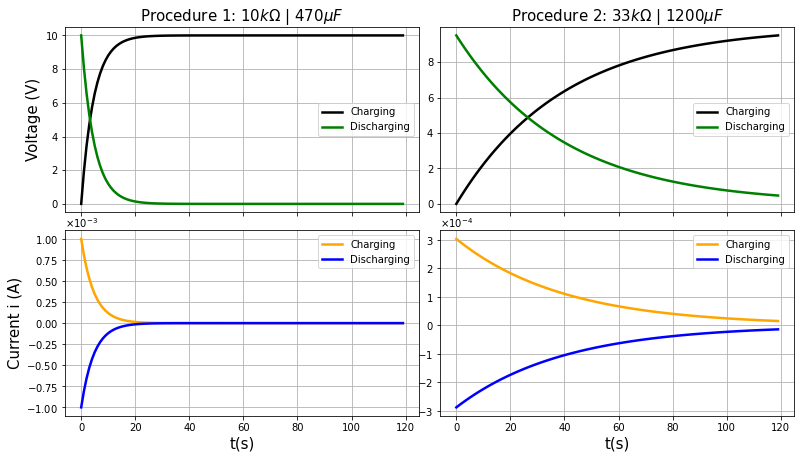

In [30]:
lW=2.5
fontSize = 15

# Parâmetros para simulação 
C1 = 470*(10**(-6))        # Farad
R1 = 10*(10**(3))          # Ohms
V = 10                    # Volts

C2 = 1200*(10**(-6))        # Farad
R2 = 33*(10**(3))          # Ohms

# Passo do tempo para simulação
#t = np.array(list(np.arange(0, 35, 5)) + list(np.arange(40, 90, 10)) + [100, 120])
t = np.arange(0, 120)

# Simulações
q1 = Q(C1, R1, V, t)         # Chamando a função de carga no carregamento
i1 = I(C1, R1, V, t)         # Chamando a função de corrente no carregamento 

qD1 = Q2(C1, R1, V, t)       # Chamando a função de carga no descarregamento
iD1 = I2(C1, R1, V, t)       # Chamando a função de corrente no descarregamento

################################################################################

q2 = Q(C2, R2, V, t)         # Chamando a função de carga no carregamento
i2 = I(C2, R2, V, t)         # Chamando a função de corrente no carregamento 

qD2 = Q2(C2, R2, V, t)       # Chamando a função de carga no descarregamento
iD2 = I2(C2, R2, V, t)       # Chamando a função de corrente no descarregamento



figure, [[ax1, ax2], [ax3, ax4]] = plt.subplots(nrows=2, ncols=2, figsize=(15, 8), sharex=True)
figure.subplots_adjust(hspace=0.098, wspace = 0.06)
plt.subplots_adjust(right=.8, top=.8)

ax1.set_title(r"Procedure 1: $10 k\Omega \ | \ 470 \mu F$", fontsize=fontSize)
ax1.plot(t, q1/C1, "k", label="Charging", lw = lW)
ax1.plot(t, qD1/C1, "green" , label="Discharging", lw = lW)
ax1.set_ylabel("Voltage (V)", fontsize=fontSize)
ax1.grid()
ax1.legend()

#####Corrente
ax3.plot(t, i1, color="orange", label="Charging", linewidth=lW)
ax3.plot(t, iD1, color="blue", label="Discharging", linewidth=lW)
ax3.set_xlabel("t(s)", fontsize=fontSize)
ax3.set_ylabel("Current i (A)", fontsize=fontSize)
ax3.ticklabel_format(useMathText=True, style='sci', axis='y', scilimits=(0,0))
ax3.grid()
ax3.legend()


ax2.set_title(r"Procedure 2: $33 k\Omega \ | \ 1200 \mu F$", fontsize=fontSize)
ax2.plot(t, q2/C2, "k", label="Charging", lw = lW)
ax2.plot(t, qD2/C2, "green" , label="Discharging", lw = lW)
ax2.grid()
ax2.legend()


ax4.plot(t, i2, color="orange", label="Charging", linewidth=lW)
ax4.plot(t, iD2, color="blue", label="Discharging", linewidth=lW)
ax4.set_xlabel("t(s)", fontsize=fontSize)
ax4.ticklabel_format(useMathText=True, style='sci', axis='y', scilimits=(0,0))
ax4.grid()
ax4.legend()

figure.savefig("medidos_simulados.pdf")

#plt.grid()
#plt.legend(loc=0)
#plt.show()
#plt.close()

---
## EXEMPLO 27.12 - Sears e Zemansky - Física III - Young & Freedman - 10ª edição
####Carregando um capacitor
Um resistor com resistências 10 M$Ω$ é conectado em série com um capacitor cuja capacitância é de 1,0 $\mu$F e com uma bateria de fem igual a 12 V. Antes de a chave ser fechada no instante t = 0, o capacitor está descarregado. 

a) Qual é a constante de tempo? 

b) Qual é a fração da carga final que está sobre uma das placas quando $t = 46 s$?

c)Qual é a fração da corrente inicial que permanece quando t = 46 s? 

In [ ]:
# As funções definidas no 2ª passo, podem ser utilizadas aqui também.
# Primeiro é preciso definir a resistência, capacitância e tempo.
R = 10*10**6 
C = 10**(-6)
V = 12
t = 46  # No instante 46 seg. 


print(f"Solução\na) {R*C}")
print(f"b) {Q(C, R, V, t)/(C*V)}")
print(f"c) {I(C, R, V, t)/(V/R)}")

Solução
a) 10.0
b) 0.9899481642553665
c) 0.010051835744633588 = 1.0051835744633588 


Depois de um tempo igual a 4,6 constantes de tempo, a corrente diminui para 1% do seu valor inicial.